## How to use the chemistry solver of pyC$^2$Ray

In this tutorial, you can use the chemistry algorithm of pyC$^2$Ray as stand alone. However, this tutorial uses a simplified version of the chemistry solver (doric method) that can be used only for very small time-step ($\Delta t < 100\,\rm yr$). 

Here, we show a simple implementation on how to use the chemistry solver:

In [2]:
import numpy as np
import pyc2ray as pc2r
import matplotlib.pyplot as plt

import astropy.units as u
import astropy.constants as cst
from astropy.cosmology import Planck18 as cosmo

In this example we define some random density fields for the gas density `ndens`, temperature `temp`, ionization fraction `xh` and photo-ionization rate `phi_ion`. These four field can be a single value or a numpy array with the same shape.

In [7]:
mesh_shape = (10,10,10)

np.random.seed(2023)
# density field [g/cm^3]
ndens = np.random.normal(loc=1e-7, scale=1e-8, size=mesh_shape)

# temperature [K]
temp = np.ones(mesh_shape)*1e4

# Hydrogen ionization fraction
xh = np.random.uniform(low=0, high=0.1, size=mesh_shape)
xh_ini = xh

# photo-ionization rate [s^-1]
phi_ion = np.random.uniform(low=1e-13, high=1e-12, size=mesh_shape)

# clumping factor
clumping = np.ones(mesh_shape)

### Define the time-step loop

Define a time lenght `dt` (in seconds units) and loop over `t_steps` many time-steps.

The chemistry solver method employed in a pyC$^2$Ray assumes a constant electron density $n_e$ and photo-ionization rate $\Gamma_{\rm HI}$ within each time-step (which can be of several Myr). Therefore, a convergence loop is included in cosmological runs, to update the two fields and converge to the correct solution.

Therefore, if you wish to use the chemistry solver alone you need to select relativly small time length ($\Delta t<100\, \rm yr$) and this can depend on the strenght of the sources flux or ionization fraction of the voxel. For this reason, here the code fail if the more then 1% of the voxels did not converged.

In [8]:
# time-step
dt = 50*u.yr
t_steps = 100

print('Volume-averaged ionized fraction at t=0: %.3f' %np.mean(xh_ini))

# calculate ODE
for i in range(t_steps):
    new_xh = pc2r.hydrogen.hydrogenODE(dt=dt.cgs.value, ndens=ndens, temp=temp, xh=xh, phi_ion=phi_ion, clump=clumping)
    xh = new_xh

print('Volume-averaged ionized fraction after t=%d %s: %.3f' %(dt.value*t_steps, dt.unit, np.mean(xh)))

Volume-averaged ionized fraction at t=0: 0.050
Volume-averaged ionized fraction after t=5000 yr: 0.127


Plot the results the inital and final neutral fraction field.

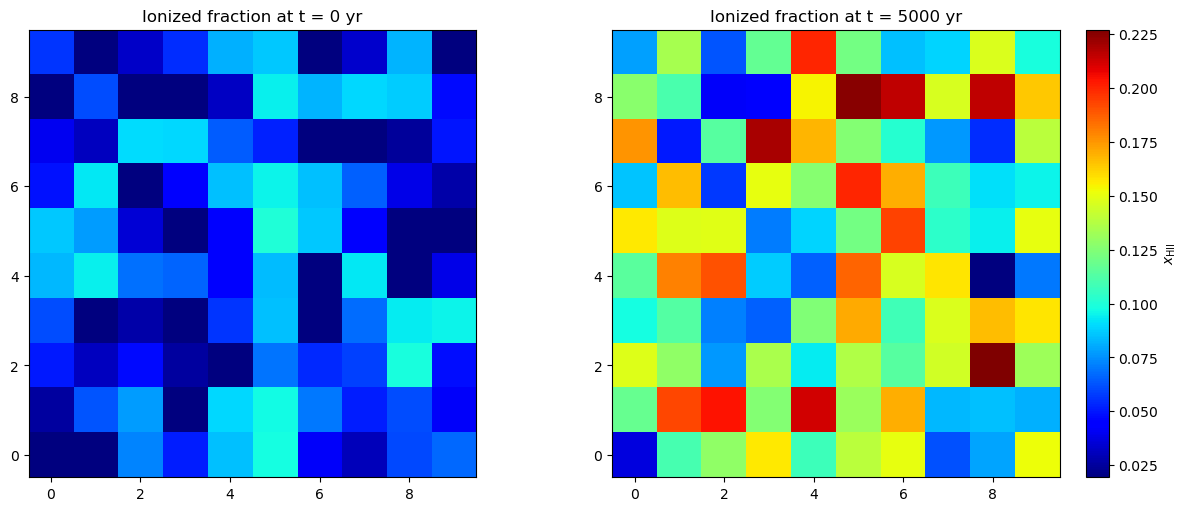

In [9]:
fig, axs = plt.subplots(figsize=(12,5), ncols=2, nrows=1, layout="constrained")
axs[0].set_title('Ionized fraction at t = 0 %s' %dt.unit)
im = axs[0].imshow(xh_ini[:,mesh_shape[1]//2,:], origin='lower', cmap='jet', vmin=xh.min(), vmax=xh.max())

axs[1].set_title('Ionized fraction at t = %d %s' %(dt.value*t_steps, dt.unit))
im = axs[1].imshow(xh[:,mesh_shape[1]//2,:], origin='lower', cmap='jet')
plt.colorbar(im, ax=axs[1], label=r'$x_{\rm HII}$')

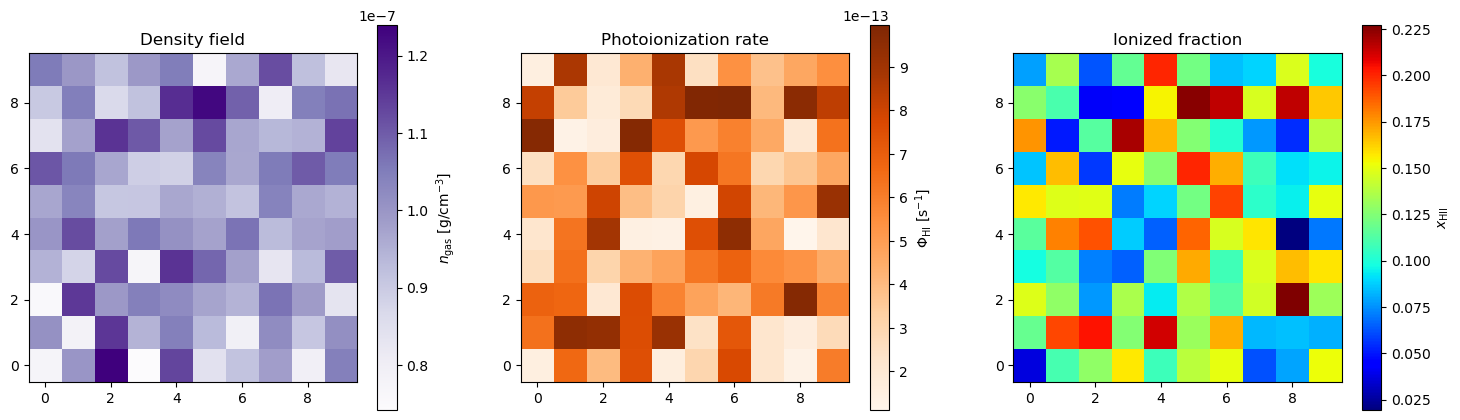

In [10]:
fig, axs = plt.subplots(figsize=(18,5), ncols=3, nrows=1)
axs[0].set_title('Density field')
im = axs[0].imshow(ndens[:,mesh_shape[1]//2,:], origin='lower', cmap='Purples')
plt.colorbar(im, ax=axs[0], label=r'$n_{\rm gas}$ [g/$\rm cm^{-3}$]')

axs[1].set_title('Photoionization rate')
im = axs[1].imshow(phi_ion[:,mesh_shape[1]//2,:], origin='lower', cmap='Oranges')
plt.colorbar(im, ax=axs[1], label=r'$\Phi_{\rm HI}$ [$\rm s^{-1}$]')

axs[2].set_title('Ionized fraction')
im = axs[2].imshow(xh[:,mesh_shape[1]//2,:], origin='lower', cmap='jet')
plt.colorbar(im, ax=axs[2], label=r'$x_{\rm HII}$')